In [2]:
!ceph_quota

Path                            Type      Quota GB    Usage GB    Avail GB    Usage %  Updated
------------------------------  ------  ----------  ----------  ----------  ---------  -------------------
/scratch/prj/inf_narrative_msc  Group         1000         411         589         41  2025-07-20 11:48:45
/scratch/users/k24086575        User           200           0         200          0  2025-07-20 11:48:45
/users/k24086575                User            50          42           8         84  2025-07-20 11:48:45


In [9]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import ast
import csv
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
path = "./inf_narrative_msc/k24086575/dot_product/neuron_contribution_between_class.csv"
df = pd.read_csv(path, encoding="utf-8-sig")
df.head()

,Unnamed: 0,type,layer,class1,class2,Neuron_ID,Contribution
0,0,mlp,7,math,programming,6117,8.144039e+11
1,1,mlp,24,math,programming,9329,7.782393e+11
2,2,mlp,23,math,programming,10184,7.565522e+11
3,3,res,1,math,programming,12054,6.470184e+11
4,4,mlp,24,math,programming,282,5.486137e+11


In [6]:
import requests

def get_feature(model_id, source, index):
    try:
        url = f"https://www.neuronpedia.org/api/feature/{model_id}/{source}/{index}"
        resp = requests.get(url)
        resp.raise_for_status()            # throws if not 200
        feature = resp.json()
        
        # 2. Grab the list of explanations (might be empty!)
        explanations = feature.get("explanations", [])
        
        # 3. first description:
        # if explanations:
        return explanations[0]["description"]
    except e:
        return None
    
for i in range(10):
    model = "gemma-2-2b"
    layer = 21
    sae_type = "mlp"
    source = f"{layer}-gemmascope-{sae_type}-16k"
    feat = get_feature(model, source, i)
    print(feat)



# model = "gemma-2-2b"

# explanations = []

# for idx, row in df.iterrows():
#     sae_type = df["type"]
#     layer = df["layer"]
#     neuron_id = df["Neuron_ID"]
#     source = f"{layer}-gemmascope-{sae_type}-16k"

#     feat = get_feature(model, source, neuron_id)
#     explanations.append(feat)

# df["Explanation"] = explanations
# df.to_csv(path, index=False, encoding="utf-8-sig")

 instances of parentheses and expressions of the concept of "status quo."
elements of HTML and programming language syntax
 references to programming methods and serialization processes
 programming loops and function definitions
references to SEO practices and related features in marketing contexts
 phrases expressing possession or ownership
aspirations related to careers in design and cuisine
references to specific individuals and their roles in a legal context
 references to specific objects or tools in a narrative context
 phrases indicating duration or quantity of time


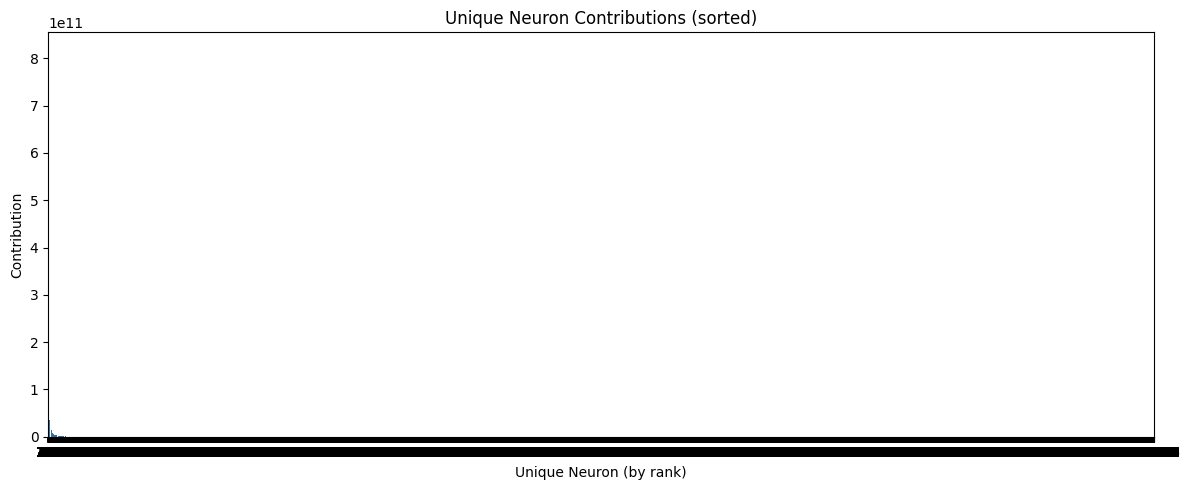

In [16]:
unique_contrib = (
    df["Contribution"]
    .drop_duplicates()
    .sort_values(ascending=False)
    .reset_index(drop=True)
)

plt.figure(figsize=(12, 5))
sns.barplot(x=unique_contrib.index, y=unique_contrib.values)
plt.xlabel("Unique Neuron (by rank)")
plt.ylabel("Contribution")
plt.title("Unique Neuron Contributions (sorted)")
plt.tight_layout()
plt.show()

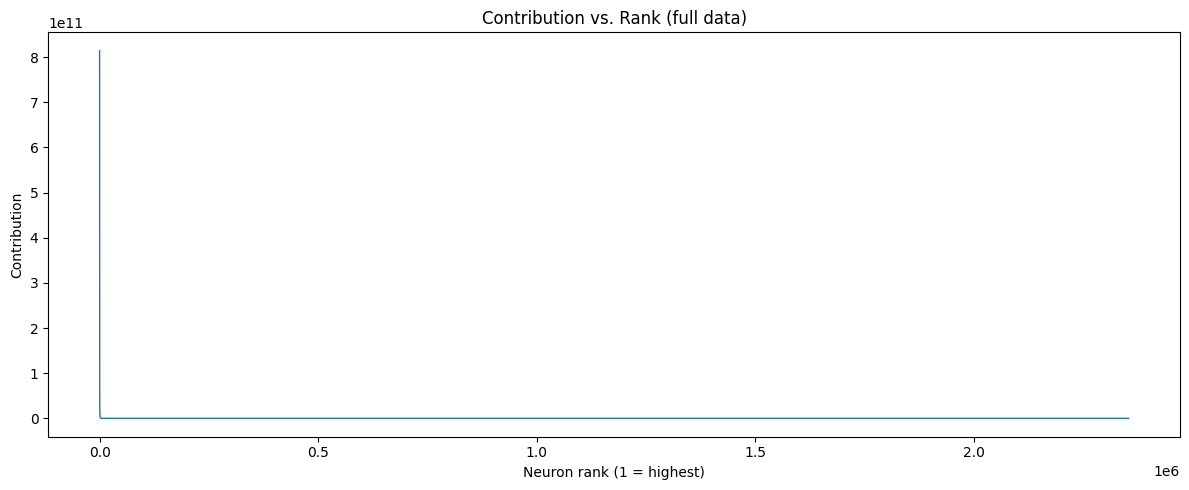

In [13]:
# 3. how the full 2 M contributions decay: rank-vs-value plot
all_sorted = df["Contribution"].sort_values(ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 5))
plt.plot(all_sorted.values, linewidth=1)
plt.xlabel("Neuron rank (1 = highest)")
plt.ylabel("Contribution")
plt.title("Contribution vs. Rank (full data)")
plt.tight_layout()
plt.show()

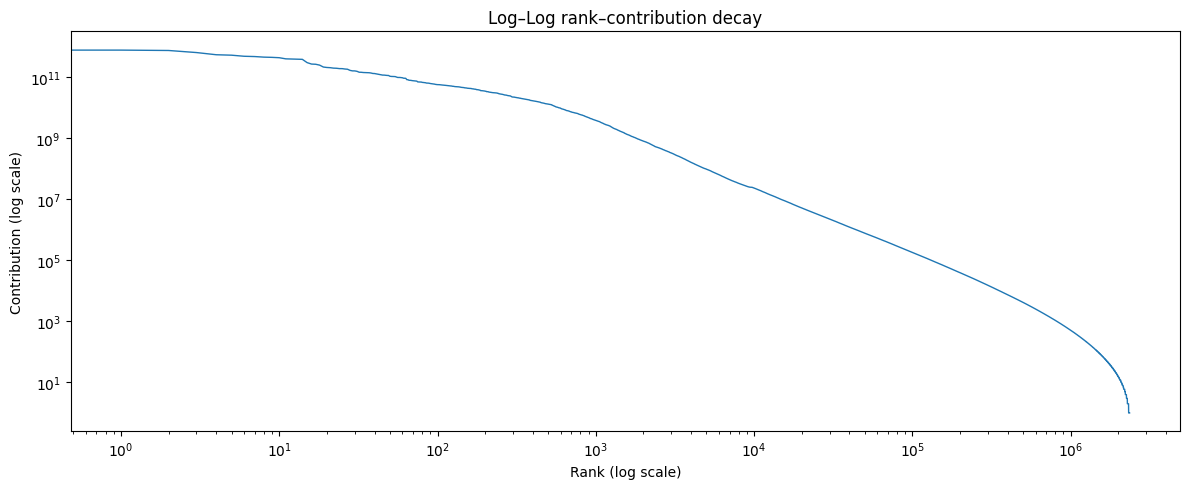

In [17]:
# 3b. (optionally) log–log to highlight the tail
plt.figure(figsize=(12, 5))
plt.loglog(all_sorted.values, linewidth=1)
plt.xlabel("Rank (log scale)")
plt.ylabel("Contribution (log scale)")
plt.title("Log–Log rank–contribution decay")
plt.tight_layout()
plt.savefig("log_rank_contribution.png", dpi=300, bbox_inches="tight")
plt.show()

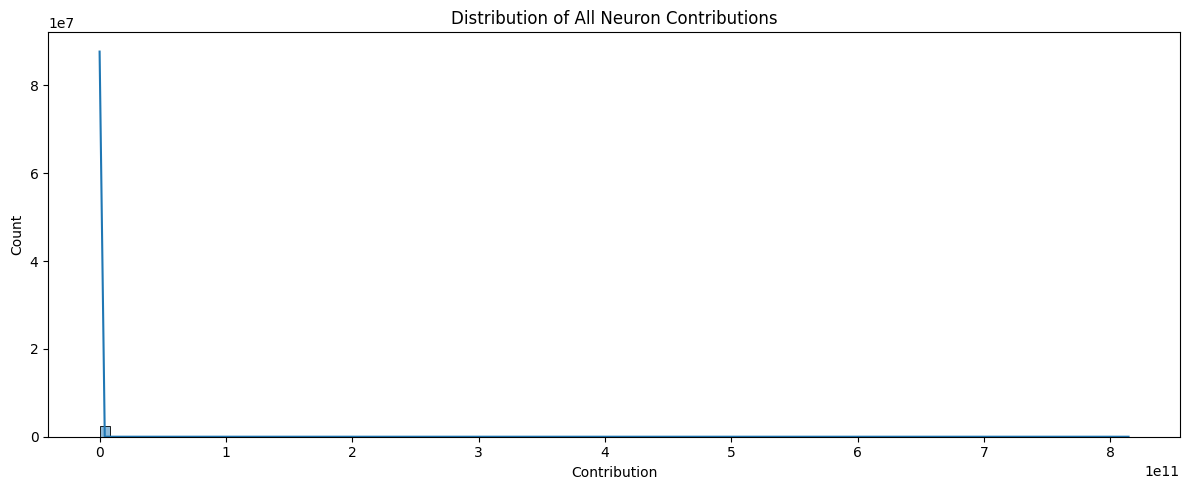

In [15]:
# 4. (bonus) histogram / density of all contributions
plt.figure(figsize=(12, 5))
sns.histplot(df["Contribution"], bins=100, kde=True)
plt.xlabel("Contribution")
plt.ylabel("Count")
plt.title("Distribution of All Neuron Contributions")
plt.tight_layout()
plt.show()

# Auto interpret

In [19]:
import requests

def get_feature(model_id, source, index):
    try:
        url = f"https://www.neuronpedia.org/api/feature/{model_id}/{source}/{index}"
        resp = requests.get(url)
        resp.raise_for_status()            # throws if not 200
        feature = resp.json()
        
        # 2. Grab the list of explanations (might be empty!)
        explanations = feature.get("explanations", [])
        
        # 3. first description:
        # if explanations:
        return explanations[0]["description"]
    except Exception as e:
        return None
    
for i in range(10):
    model = "gemma-2-2b"
    layer = 21
    sae_type = "mlp"
    source = f"{layer}-gemmascope-{sae_type}-16k"
    feat = get_feature(model, source, i)
    print(feat)

 instances of parentheses and expressions of the concept of "status quo."
elements of HTML and programming language syntax
 references to programming methods and serialization processes
 programming loops and function definitions
references to SEO practices and related features in marketing contexts
 phrases expressing possession or ownership
aspirations related to careers in design and cuisine
references to specific individuals and their roles in a legal context
 references to specific objects or tools in a narrative context
 phrases indicating duration or quantity of time


In [20]:
path = "./scratch/topContributingNeurons.csv"
df = pd.read_csv(path, encoding="utf-8-sig")
df.head()

,Unnamed: 0,type,layer,class1,class2,Neuron_ID,Contribution
0,0,mlp,7,math,programming,6117,8.144039e+11
1,1,mlp,24,math,programming,9329,7.782393e+11
2,2,mlp,23,math,programming,10184,7.565522e+11
3,3,res,1,math,programming,12054,6.470184e+11
4,4,mlp,24,math,programming,282,5.486137e+11


In [21]:
df.shape

(353227, 7)

In [ ]:
from tqdm.auto import tqdm

model = "gemma-2-2b"
explanations = []

# for idx, row in df.iterrows():
for idx, row in tqdm(df.iterrows(), total=len(df), desc="Fetching features"):
    sae_type  = row["type"]
    layer     = row["layer"]
    neuron_id = row["Neuron_ID"]
    source    = f"{layer}-gemmascope-{sae_type}-16k"

    feat = get_feature(model, source, neuron_id)
    explanations.append(feat)
    # print(f"{idx:>6}: type={sae_type}, layer={layer}, neuron={neuron_id} → {feat!r}")
df["Explanation"] = explanations
df.to_csv(path, index=False, encoding="utf-8-sig")

Fetching features:   0%|          | 0/353227 [00:00<?, ?it/s]